## Load Data

In [1]:
import pandas as pd

train  = pd.read_csv('./data/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
test_x = pd.read_csv('./data/test.csv')
test_y = pd.read_csv('./data/gender_submission.csv')
test = test_x.merge(test_y, on="PassengerId", how="left")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Preprocess Data

In [4]:
def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    data["Age"].fillna(data["Age"].mean(), inplace=True)
    data["Fare"].fillna(data["Fare"].mean(), inplace=True)
    data["Embarked"].fillna(data["Fare"].mode(), inplace=True)
    data = data.drop(columns=["Name", "Cabin", "Ticket"])
    return data

preprocessed_train = preprocess_data(train)
preprocessed_train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
872,873,0,1,male,33.0,0,0,5.0000,S
320,321,0,3,male,22.0,0,0,7.2500,S
607,608,1,1,male,27.0,0,0,30.5000,S
332,333,0,1,male,38.0,0,1,153.4625,S
325,326,1,1,female,36.0,0,0,135.6333,C
69,70,0,3,male,26.0,2,0,8.6625,S
623,624,0,3,male,21.0,0,0,7.8542,S
221,222,0,2,male,27.0,0,0,13.0000,S
390,391,1,1,male,36.0,1,2,120.0000,S
704,705,0,3,male,26.0,1,0,7.8542,S


## Feature Engineering

In [5]:
def engineer_features(data):
    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1
    data["IsAlone"] =  data["FamilySize"].apply(lambda familySize: 0 if familySize > 1 else 1)
    data["AgeBin"] = pd.cut(data["Age"].astype(int), 5)
    data["FareBin"] = pd.qcut(data["Fare"].astype(int), 4)
    return data

engineered_train = engineer_features(preprocessed_train)
engineered_train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeBin,FareBin
348,349,1,3,male,3.000000,1,1,15.9000,S,3,0,"(-0.08, 16.0]","(14.0, 31.0]"
131,132,0,3,male,20.000000,0,0,7.0500,S,1,1,"(16.0, 32.0]","(-0.001, 7.0]"
760,761,0,3,male,29.699118,0,0,14.5000,S,1,1,"(16.0, 32.0]","(7.0, 14.0]"
61,62,1,1,female,38.000000,0,0,80.0000,NaN,1,1,"(32.0, 48.0]","(31.0, 512.0]"
323,324,1,2,female,22.000000,1,1,29.0000,S,3,0,"(16.0, 32.0]","(14.0, 31.0]"
805,806,0,3,male,31.000000,0,0,7.7750,S,1,1,"(16.0, 32.0]","(-0.001, 7.0]"
880,881,1,2,female,25.000000,0,1,26.0000,S,2,0,"(16.0, 32.0]","(14.0, 31.0]"
233,234,1,3,female,5.000000,4,2,31.3875,S,7,0,"(-0.08, 16.0]","(14.0, 31.0]"
281,282,0,3,male,28.000000,0,0,7.8542,S,1,1,"(16.0, 32.0]","(-0.001, 7.0]"
776,777,0,3,male,29.699118,0,0,7.7500,Q,1,1,"(16.0, 32.0]","(-0.001, 7.0]"


In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


def label_features(data):
    encoded = pd.get_dummies(data[["Sex", "Embarked"]])
    data = pd.concat([data, encoded], axis=1)
    return data

labeled_data = label_features(engineered_train)
labeled_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,AgeBin,FareBin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.000000,1,0,7.2500,S,2,0,"(16.0, 32.0]","(-0.001, 7.0]",0,1,0,0,1
1,2,1,1,female,38.000000,1,0,71.2833,C,2,0,"(32.0, 48.0]","(31.0, 512.0]",1,0,1,0,0
2,3,1,3,female,26.000000,0,0,7.9250,S,1,1,"(16.0, 32.0]","(-0.001, 7.0]",1,0,0,0,1
3,4,1,1,female,35.000000,1,0,53.1000,S,2,0,"(32.0, 48.0]","(31.0, 512.0]",1,0,0,0,1
4,5,0,3,male,35.000000,0,0,8.0500,S,1,1,"(32.0, 48.0]","(7.0, 14.0]",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,1,1,"(16.0, 32.0]","(7.0, 14.0]",0,1,0,0,1
887,888,1,1,female,19.000000,0,0,30.0000,S,1,1,"(16.0, 32.0]","(14.0, 31.0]",1,0,0,0,1
888,889,0,3,female,29.699118,1,2,23.4500,S,4,0,"(16.0, 32.0]","(14.0, 31.0]",1,0,0,0,1
889,890,1,1,male,26.000000,0,0,30.0000,C,1,1,"(16.0, 32.0]","(14.0, 31.0]",0,1,1,0,0


In [7]:
def select_features_to_model(data):
    return data[["Survived", "Pclass", "FamilySize", "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Age", "Fare"]]

In [8]:
def split_x_y(data):
    X = data.drop(columns=["Survived"])
    Y = data["Survived"]
    return X, Y

X_train, Y_train = split_x_y(engineered_train)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Pclass       891 non-null    int64   
 2   Sex          891 non-null    object  
 3   Age          891 non-null    float64 
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Fare         891 non-null    float64 
 7   Embarked     889 non-null    object  
 8   FamilySize   891 non-null    int64   
 9   IsAlone      891 non-null    int64   
 10  AgeBin       891 non-null    category
 11  FareBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 72.0+ KB


In [9]:
def process(data: pd.DataFrame):
    return (data
            .pipe(preprocess_data)
            .pipe(engineer_features)
            .pipe(label_features)
            .pipe(select_features_to_model)
            .pipe(split_x_y))

X_train, Y_train = process(train)

X_train.head()

,Pclass,FamilySize,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age,Fare
0,3,2,0,1,0,0,1,22.0,7.2500
1,1,2,1,0,1,0,0,38.0,71.2833
2,3,1,1,0,0,0,1,26.0,7.9250
3,1,2,1,0,0,0,1,35.0,53.1000
4,3,1,0,1,0,0,1,35.0,8.0500


## Explore Data

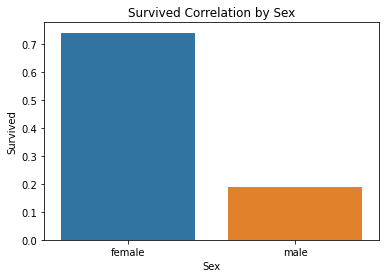

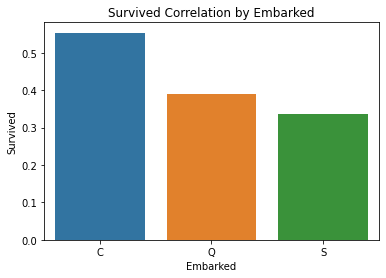

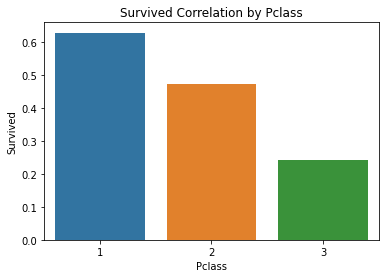

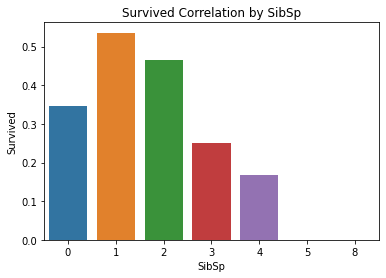

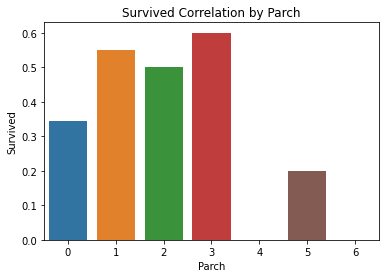

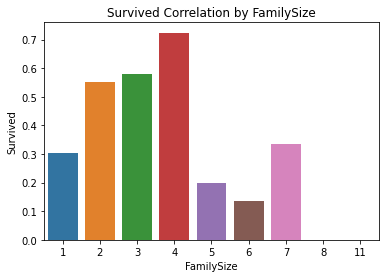

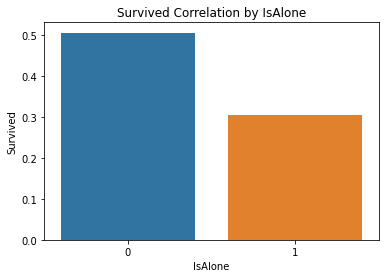

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def compare_relation(data: pd.DataFrame, target, columns):
    for column in columns:
        if column == target: continue
        correlation = data[[column, target]].groupby(column, as_index=False).mean()
        sns.barplot(x=column, y=target, data=correlation).set_title(f'{target} Correlation by {column}')
        plt.show()

compare_relation(labeled_data, "Survived", ["Sex", "Embarked", "Pclass", "SibSp", "Parch", "FamilySize", "IsAlone"])

## Model Selection

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "MultinomialNB",
    "Stochastic Gradient Descent Classifier",
    "Gradient Boosting Classifier",
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    MultinomialNB(),
    SGDClassifier(),
    GradientBoostingClassifier()
]

In [12]:
from sklearn.model_selection import cross_val_score 
def score_classifer(classifier, X, Y):
    return cross_val_score(classifier, X.values, Y.values, cv=5).mean()

for classifier, name in zip(classifiers, names):
    score = score_classifer(classifier, X_train, Y_train)
    print(f"{name} - {score}")

c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Logistic Regression - 0.7923984683949533
Nearest Neighbors - 0.7059757705103258
Linear SVM - 0.7856192329420627
RBF SVM - 0.644209403050656


c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warning

Gaussian Process - 0.7125918021467579
Decision Tree - 0.8170610758897746
Random Forest - 0.8204318624066286
Neural Net - 0.7890402360178268
AdaBoost - 0.805881614462369
Naive Bayes - 0.7867804908668633
QDA - 0.5891846086246939
MultinomialNB - 0.6925930575607306
Stochastic Gradient Descent Classifier - 0.718410645910489


c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\Job\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Gradient Boosting Classifier - 0.8283158621555458


## Train Model

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [5, 10, 50, 100],  
    'max_depth': [2, 4, 6, 8, 10, None], 
    'random_state': [0, 1] }
dtree = RandomForestClassifier()
model = GridSearchCV(dtree, param_grid=param_grid, scoring = 'roc_auc', cv = 5)
model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, None],
                         'n_estimators': [5, 10, 50, 100],
                         'random_state': [0, 1]},
             scoring='roc_auc')

### Evaluate Model

In [14]:
model.score(X_train, Y_train)

0.9677217482077993

## Test Model

In [15]:
X_test, Y_test = process(test)
model.score(X_test, Y_test)

0.9418035219628018

In [16]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       266
           1       0.86      0.76      0.81       152

    accuracy                           0.87       418
   macro avg       0.87      0.85      0.85       418
weighted avg       0.87      0.87      0.87       418



### Confusion Matrix

Text(33.0, 0.5, 'True Label')

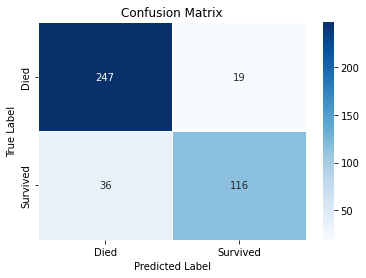

In [17]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, predictions)
fig = sns.heatmap(cnf_matrix, linewidths=1, annot=True, fmt='g', xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"], cmap="Blues")
fig.set_title("Confusion Matrix")
fig.set_xlabel("Predicted Label")
fig.set_ylabel("True Label")

### Normalized Confusion Matrix

Text(33.0, 0.5, 'True Label')

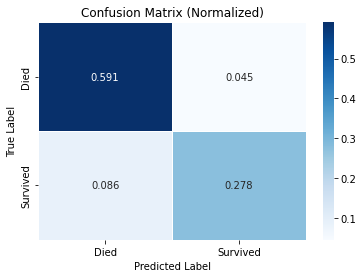

In [18]:
import numpy as np

cnf_matrix = confusion_matrix(Y_test, predictions)
cnf_matrix = cnf_matrix / cnf_matrix.flatten().sum()

fig = sns.heatmap(cnf_matrix, linewidths=1, annot=True, fmt='.3f', xticklabels=["Died", "Survived"], yticklabels=["Died", "Survived"], cmap="Blues")
fig.set_title("Confusion Matrix (Normalized)")
fig.set_xlabel("Predicted Label")
fig.set_ylabel("True Label")

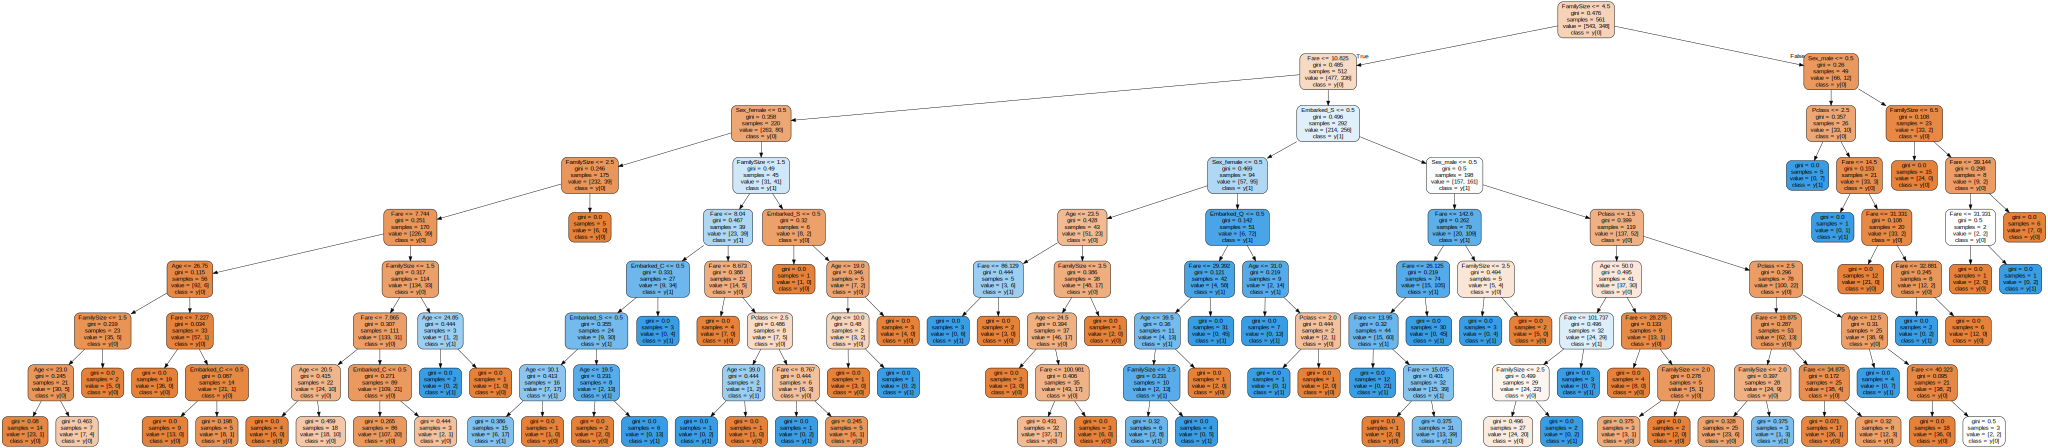

In [19]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model.best_estimator_.estimators_[5], out_file=None, 
                                feature_names = X_train.columns, class_names = True,
                                filled = True, rounded = True)
graph = graphviz.Source(dot_data) 
graph

## Export Results

In [20]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"], "Survived": predictions})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [22]:
submission.to_csv("submission.csv", index=False)